In [3]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [4]:
# 2.Load Dataset
data = pd.read_csv("./drive/MyDrive/data/gas_electric_data.csv")
data

,Month,Gas Use,Electric Use
0,Jan,244,967
1,Feb,228,795
2,Mar,153,820
3,Apr,140,672
4,May,55,722
5,Jun,34,820
6,Jul,30,1326
7,Aug,28,1262
8,Sep,29,1126
9,Oct,41,814


In [5]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Month         24 non-null     object
 1   Gas Use       24 non-null     int64 
 2   Electric Use  24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


,Gas Use,Electric Use
count,24.000000,24.000000
mean,107.791667,945.250000
std,86.541761,225.455144
min,26.000000,672.000000
25%,32.250000,800.250000
50%,70.500000,854.000000
75%,190.750000,1006.750000
max,247.000000,1445.000000


In [6]:
#Chọn thuộc tính
data = data[['Electric Use']]
data = data.dropna()
# data = data.reset_index(drop=True)
data

,Electric Use
0,967
1,795
2,820
3,672
4,722
5,820
6,1326
7,1262
8,1126
9,814


<Axes: >

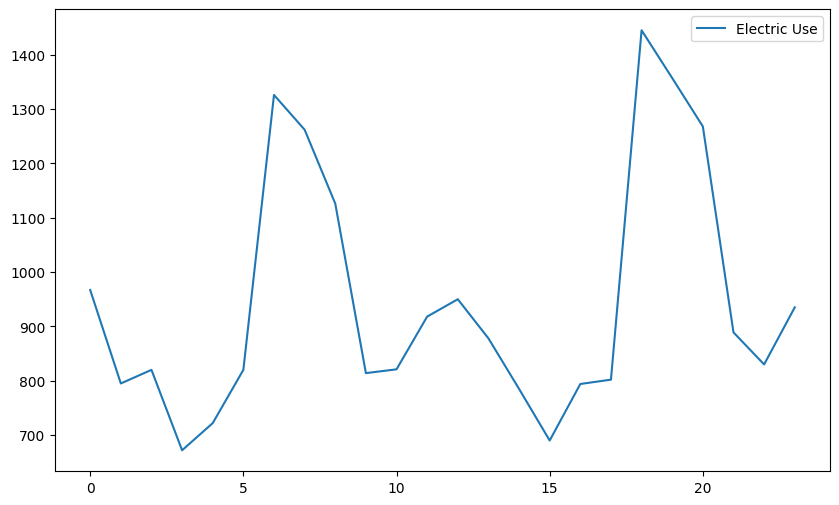

In [7]:
data.plot(figsize=(10,6))

In [8]:
# Chia tập dữ liệu thành train, test (90-10)
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.9 * len(data))
test_size = int(0.1 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", train_data)
print("Test data size:", len(test_data))

Train data size:     Electric Use
0            967
1            795
2            820
3            672
4            722
5            820
6           1326
7           1262
8           1126
9            814
10           821
11           918
12           950
13           878
14           785
15           690
16           794
17           802
18          1445
19          1357
20          1268
Test data size: 2


In [9]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00


In [10]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Electric Use'])

# Train model
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=292.739, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=286.358, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=287.692, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=350.967, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=286.132, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=283.086, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=284.510, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=284.164, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=286.147, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=295.949, Time=0.05 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 1.046 seconds


ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True)

In [11]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Electric Use'])
y_pred = model.predict(n_periods=len(y_test))

In [12]:
# 6. Quá trình tạo index predict 7 tháng tiếp theo
last_index =  data.index[-1]
next_7_months_index = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Tạo mảng 7 tháng
x_next_7_months = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Dự đoán 7 tháng tiếp theo
y_next_7_months = model.predict(n_periods=len(x_next_7_months))

# In ra dự đoán Electric Use trong 7 tháng tiếp theo
print('Predicted Electric Use for the next 7 months:')
print(y_next_7_months)

Predicted Electric Use for the next 7 months:
[ 806.12947914  625.41119851  589.25288003  840.57910078 1072.28487354
 1208.2171559  1129.0734934 ]


In [13]:
# Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 156.0834727357704


In [14]:
# MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', mape_test)

Testing MAPE: 16.985510783675757


In [15]:
# MAE
mae_test = np.mean(np.abs(y_test - y_pred))
print("Testing MAE:", mae_test)

Testing MAE: 143.72966117541569


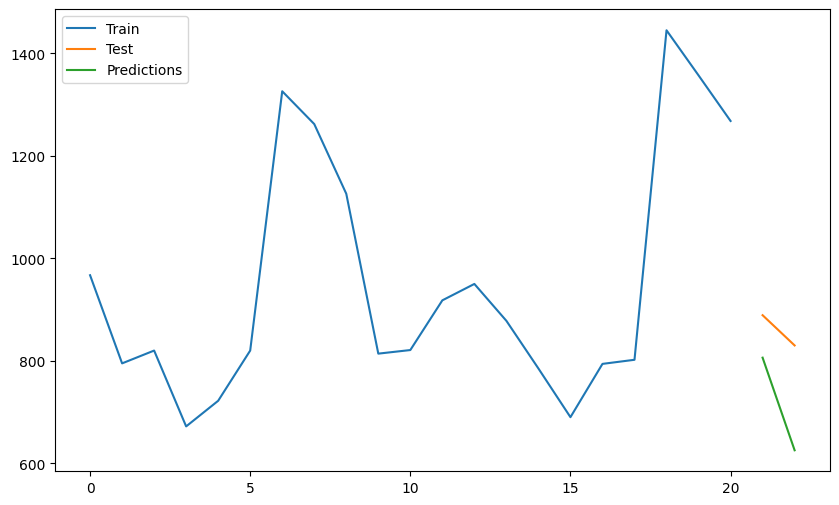

In [16]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Electric Use'])
plt.plot(test_data.index, test_data['Electric Use'])
plt.plot(test_data.index, y_pred)
plt.legend(['Train', 'Test','Predictions'])
plt.show()

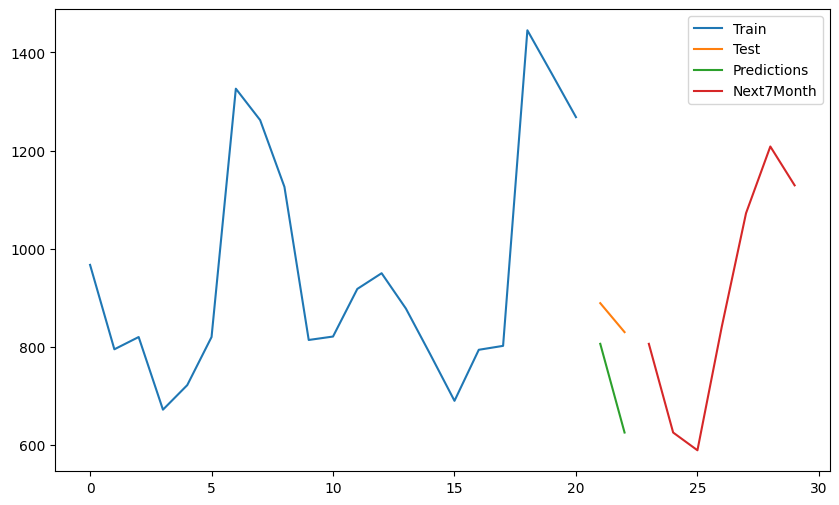

In [17]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Electric Use'])
plt.plot(test_data.index, test_data['Electric Use'])
plt.plot(test_data.index, y_pred)
plt.plot(next_7_months_index,y_next_7_months)
plt.legend(['Train', 'Test', 'Predictions', 'Next7Month'])
plt.show()

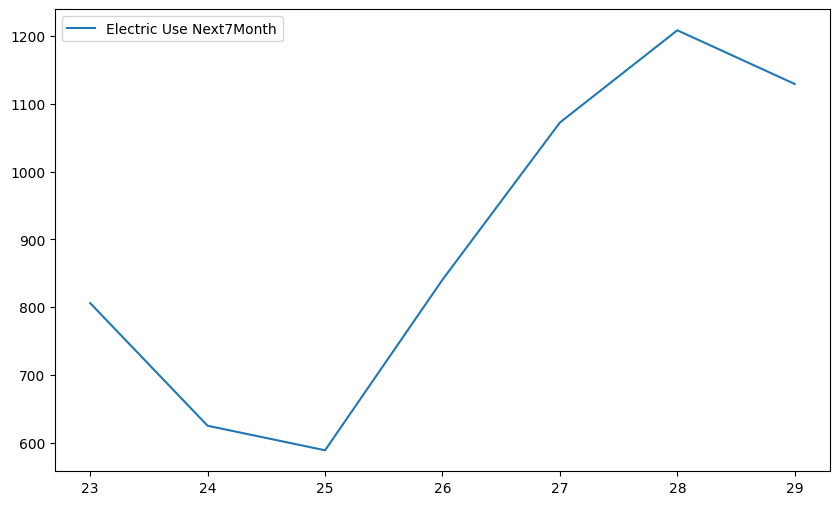

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(next_7_months_index,y_next_7_months)
plt.legend(['Electric Use Next7Month'])
plt.show()